In [100]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [101]:
# Importing the dataset
dataset = pd.read_csv('kidney_disease2.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    float64
 6   pc              335 non-null    float64
 7   pcc             396 non-null    float64
 8   ba              396 non-null    float64
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

In [102]:
dataset.isnull().sum()

# remove the highest nan values column
column_tobe_drop = dataset[['rbc','wc','rc']]
dataset.drop(columns=column_tobe_drop,axis='columns')

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1.0,0.0,0.0,121.0,36.0,...,NaN,15.4,44.0,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,1.0,0.0,0.0,NaN,18.0,...,NaN,11.3,38.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,1.0,0.0,0.0,423.0,53.0,...,NaN,9.6,31.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,0.0,117.0,56.0,...,2.5,11.2,32.0,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,1.0,0.0,0.0,106.0,26.0,...,NaN,11.6,35.0,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,0.0,0.0,140.0,49.0,...,4.9,15.7,47.0,0.0,0.0,0.0,1.0,0.0,0.0,0
396,42.0,70.0,1.025,0.0,0.0,1.0,0.0,0.0,75.0,31.0,...,3.5,16.5,54.0,0.0,0.0,0.0,1.0,0.0,0.0,0
397,12.0,80.0,1.020,0.0,0.0,1.0,0.0,0.0,100.0,26.0,...,4.4,15.8,49.0,0.0,0.0,0.0,1.0,0.0,0.0,0
398,17.0,60.0,1.025,0.0,0.0,1.0,0.0,0.0,114.0,50.0,...,4.9,14.2,51.0,0.0,0.0,0.0,1.0,0.0,0.0,0


<Axes: >

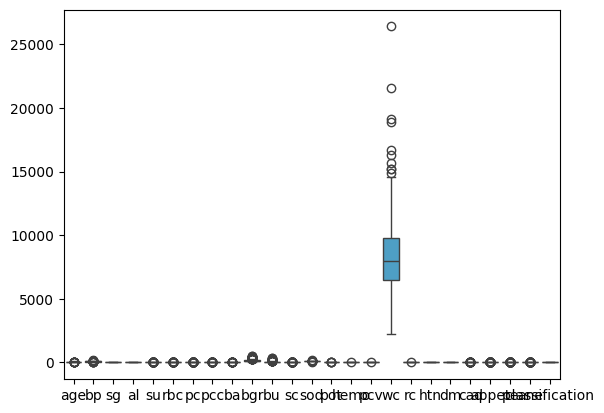

In [103]:
import seaborn as sns 
sns.boxplot(dataset)

In [104]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,24].values
#handling missing data

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',)
imputer = imputer.fit(X[:,:24])
X[:,:24] = imputer.transform(X[:,:24])

In [105]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state =42,stratify=y)

In [106]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
import joblib
train=list(X_train)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Save it
scaler_file = "standard_scalar_NN.pkl"
joblib.dump(sc, scaler_file)

['standard_scalar_NN.pkl']

------ classification
1    250
0    150
Name: count, dtype: int64 ----------


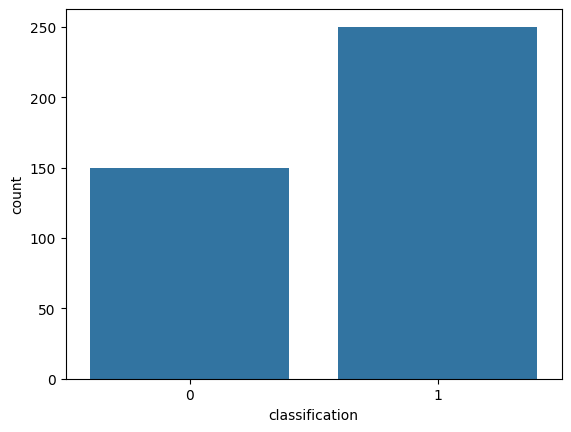

In [107]:
#EXPLORING THE DATASET
import seaborn as sn
sn.countplot(x='classification',data=dataset)
dataset.classification.value_counts()
print("------",dataset.classification.value_counts(),"----------")

# Decision Tree

In [108]:
# # Fitting Decision Tree Classification to the Training set
# from sklearn.tree import DecisionTreeClassifier
# classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,splitter='best',max_depth=6)
# classifier.fit(X_train, y_train)

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
classifier = DecisionTreeClassifier()
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy on Test Set: 0.945


In [110]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2,random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [111]:
filename ='decision_tree_model.pkl'
joblib.dump(classifier,filename)

# Predicting the Test set results
print(X_test)
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)

[[ 0.82456992  0.20413624  0.00864293 ...  0.49506904  1.9681854
  -0.43869582]
 [-1.07237421  0.20413624 -1.38865303 ...  0.49506904 -0.51048887
  -0.43869582]
 [ 1.33042168  0.89888524 -1.38865303 ...  0.49506904 -0.51048887
  -0.43869582]
 ...
 [ 1.33042168  0.20413624  0.49756293 ...  0.49506904 -0.51048887
  -0.43869582]
 [ 1.70981051  0.20413624  1.44067091 ...  0.49506904 -0.51048887
  -0.43869582]
 [ 1.64657904 -1.18536177  0.00864293 ...  0.49506904 -0.51048887
   2.29032869]]
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1
 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1
 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1
 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0
 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1]
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1
 1 1 0 1 0 1 1 0 0 1 0 0 1 

In [112]:
#ACCURACY SCORE
from sklearn.metrics import accuracy_score
print('Test Acuuracy :- ',accuracy_score(y_test,y_pred))


Test Acuuracy :-  0.96


In [113]:
##CONFUSION MATRIX
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)
#Interpretation:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[ 70   5]
 [  3 122]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        75
           1       0.96      0.98      0.97       125

    accuracy                           0.96       200
   macro avg       0.96      0.95      0.96       200
weighted avg       0.96      0.96      0.96       200



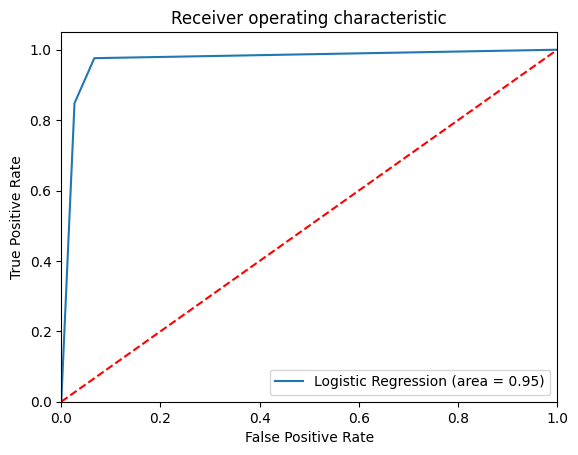

In [114]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [115]:
##PREDICTION FOR NEW DATASET

Newdataset = pd.read_csv('newdata.csv')
sc=StandardScaler()
train=sc.fit_transform(train)
Newdataset=sc.transform(Newdataset)
ynew=classifier.predict(Newdataset)
print("------",ynew)

------ [0 0 0 0 1 1]


/home/ongraph/Desktop/OnGraphProjects/Heart-and-Kidney-disease-prediction-Django/predict_risk_1/machine_learning_models/Models/venv/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


# Deep Learning

In [116]:
# Fitting Decision Tree Classification to the Training set
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(8,8,8),activation='relu',solver='adam',max_iter=500)
classifier.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=500)

In [117]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score
# # Define the hyperparameters and their possible values
# param_grid = {
#     'hidden_layer_sizes': [(10,30,10),(20,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
#     'random_state': np.arange(0,110)
# }
# classifier = MLPClassifier()
# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=10, scoring='accuracy')

# # Fit the model to the training data
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters from the grid search
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Get the best model from the grid search
# best_model = grid_search.best_estimator_

# # Predict on the test set using the best model
# y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.96


In [118]:
filename ='NN_model.pkl'
joblib.dump(classifier,filename)
# Predicting the Test set results
print(X_test)
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)

[[ 0.82456992  0.20413624  0.00864293 ...  0.49506904  1.9681854
  -0.43869582]
 [-1.07237421  0.20413624 -1.38865303 ...  0.49506904 -0.51048887
  -0.43869582]
 [ 1.33042168  0.89888524 -1.38865303 ...  0.49506904 -0.51048887
  -0.43869582]
 ...
 [ 1.33042168  0.20413624  0.49756293 ...  0.49506904 -0.51048887
  -0.43869582]
 [ 1.70981051  0.20413624  1.44067091 ...  0.49506904 -0.51048887
  -0.43869582]
 [ 1.64657904 -1.18536177  0.00864293 ...  0.49506904 -0.51048887
   2.29032869]]
[1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1
 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1
 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1]
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1
 1 1 0 1 0 1 1 0 0 1 0 0 1 

In [119]:
#ACCURACY SCORE
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.95

In [120]:
##CONFUSION MATRIX
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test, y_pred)
#Interpretation:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        75
           1       1.00      0.92      0.96       125

    accuracy                           0.95       200
   macro avg       0.94      0.96      0.95       200
weighted avg       0.96      0.95      0.95       200



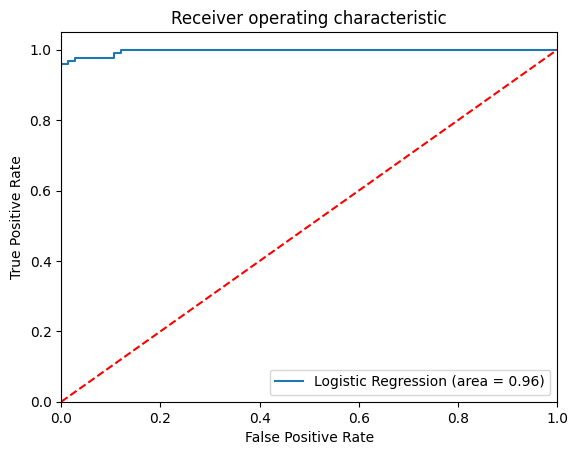

In [121]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [122]:
##PREDICTION FOR NEW DATASET

Newdataset = pd.read_csv('newdata.csv')
sca=StandardScaler()
train=sca.fit_transform(train)
Newdataset=sca.transform(Newdataset)
print(Newdataset)
ynew=classifier.predict(Newdataset)
print("---------",ynew,"------------")

[[ 2.30000000e+01  6.00000000e+01  1.02000000e+00 -5.24025268e-16
  -8.65973959e-17  1.00000000e+00  1.00000000e+00 -9.76996262e-17
  -5.99520433e-17  9.50000000e+01  2.40000000e+01  8.00000000e-01
   1.45000000e+02  5.00000000e+00  1.50000000e+01  5.20000000e+01
   7.80000000e+03  5.20000000e+00  2.18713936e-16  9.88098492e-17
  -5.77315973e-17  1.00000000e+00  5.21804822e-17 -7.10542736e-17]
 [ 4.00000000e+00  6.00000000e+01  1.02000000e+00 -5.24025268e-16
  -8.65973959e-17  1.00000000e+00  1.00000000e+00 -9.76996262e-17
  -5.99520433e-17  9.50000000e+01  4.60000000e+01  5.00000000e-01
   1.38000000e+02  4.20000000e+00  1.50000000e+01  5.00000000e+01
   7.70000000e+03  6.30000000e+00  2.18713936e-16  9.88098492e-17
  -5.77315973e-17  1.00000000e+00  5.21804822e-17 -7.10542736e-17]
 [ 3.70000000e+01  6.00000000e+01  1.02500000e+00 -5.24025268e-16
  -8.65973959e-17  1.00000000e+00  1.00000000e+00 -9.76996262e-17
  -5.99520433e-17  1.11000000e+02  3.50000000e+01  8.00000000e-01
   1.350

/home/ongraph/Desktop/OnGraphProjects/Heart-and-Kidney-disease-prediction-Django/predict_risk_1/machine_learning_models/Models/venv/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


### Accuray was 100%
***** by droping column accuracy decrease with 4 %

***** using stratify
***** by change in activation function logistic to relu accuracy remain same 96
***** 0 random state 99% ---- 42 96%

# SVC MODEL


In [123]:
# # Save it
# scaler_file = "standard_scalar_svc.pkl"
# joblib.dump(sc, scaler_file)

# X_test=sc.transform(X_test)

classification
1    250
0    150
Name: count, dtype: int64

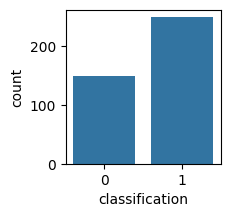

In [124]:
#EXPLORING THE DATASET
import seaborn as sn
plt.figure(figsize=(2,2))
sn.countplot(x='classification',data=dataset)
dataset.classification.value_counts()

In [125]:
##checking for different kernels

from sklearn.svm import SVC
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

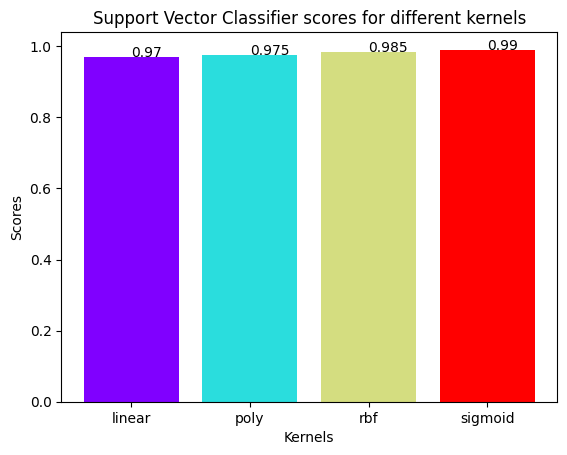

In [126]:
from matplotlib.cm import rainbow
##%matplotlib inline
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [127]:
# select kernal linear
SVC_classifier = SVC(kernel = 'linear' ,probability=True,gamma=15)
SVC_classifier.fit(X_train, y_train)

SVC(gamma=15, kernel='linear', probability=True)

In [128]:
filename = 'svc_model.pkl'
joblib.dump(SVC_classifier,filename)

['svc_model.pkl']

In [129]:
y_pred = SVC_classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.97

In [130]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#Interpretation:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        75
           1       1.00      0.95      0.98       125

    accuracy                           0.97       200
   macro avg       0.96      0.98      0.97       200
weighted avg       0.97      0.97      0.97       200



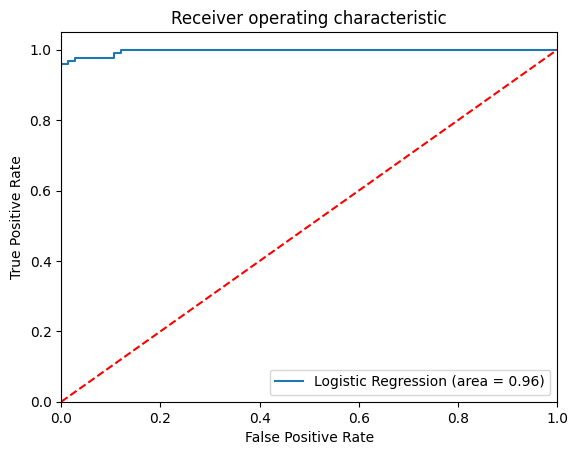

In [131]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [132]:
##PREDICTION FOR NEW DATASET

Newdataset = pd.read_csv('newdata.csv')
sc=StandardScaler()
train=sc.fit_transform(train)
Newdataset=sc.transform(Newdataset)
ynew=svc_classifier.predict(Newdataset)
print("------",ynew)

------ [1 1 1 1 1 1]


/home/ongraph/Desktop/OnGraphProjects/Heart-and-Kidney-disease-prediction-Django/predict_risk_1/machine_learning_models/Models/venv/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [133]:
# precious accuracy 100%-----------------79%

# Naive bayes

In [134]:

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [135]:
import joblib

filename ='naive_bayes_model.pkl'
joblib.dump(classifier,filename)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [136]:
#ACCURACY SCORE
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.94

In [137]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#Interpretation:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93        75
           1       0.99      0.91      0.95       125

    accuracy                           0.94       200
   macro avg       0.93      0.95      0.94       200
weighted avg       0.95      0.94      0.94       200



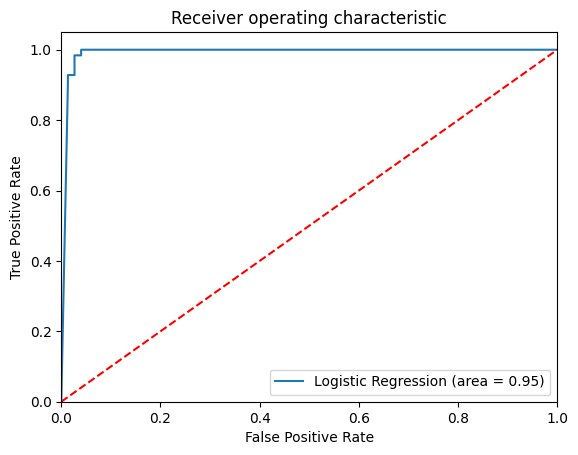

In [138]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()



In [139]:
##PREDICTION FOR NEW DATASET

Newdataset = pd.read_csv('newdata.csv')
sc=StandardScaler()
train=sc.fit_transform(train)
Newdataset=sc.transform(Newdataset)
ynew=classifier.predict(Newdataset)
print("------",ynew)

------ [1 1 1 1 1 1]


/home/ongraph/Desktop/OnGraphProjects/Heart-and-Kidney-disease-prediction-Django/predict_risk_1/machine_learning_models/Models/venv/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


# KNN PREDICTION

In [140]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# train=list(X_train)
# X_train = sc.fit_transform(X_train)
# import joblib
# # Save it
# scaler_file = "standard_scalar_KNN.pkl"
# joblib.dump(sc, scaler_file)
# X_test = sc.transform(X_test)

In [141]:
# Fitting Decision Tree Classification to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [142]:

filename ='KNN_model.pkl'
joblib.dump(classifier,filename)
# Predicting the Test set results
print(X_test)
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)

[[ 0.82456992  0.20413624  0.00864293 ...  0.49506904  1.9681854
  -0.43869582]
 [-1.07237421  0.20413624 -1.38865303 ...  0.49506904 -0.51048887
  -0.43869582]
 [ 1.33042168  0.89888524 -1.38865303 ...  0.49506904 -0.51048887
  -0.43869582]
 ...
 [ 1.33042168  0.20413624  0.49756293 ...  0.49506904 -0.51048887
  -0.43869582]
 [ 1.70981051  0.20413624  1.44067091 ...  0.49506904 -0.51048887
  -0.43869582]
 [ 1.64657904 -1.18536177  0.00864293 ...  0.49506904 -0.51048887
   2.29032869]]
[1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1
 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1
 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1]
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1
 1 1 0 1 0 1 1 0 0 1 0 0 1 

In [143]:
#ACCURACY SCORE
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.945


In [144]:

##CONFUSION MATRIX
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
cm

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        75
           1       1.00      0.91      0.95       125

    accuracy                           0.94       200
   macro avg       0.94      0.96      0.94       200
weighted avg       0.95      0.94      0.95       200



array([[ 75,   0],
       [ 11, 114]])

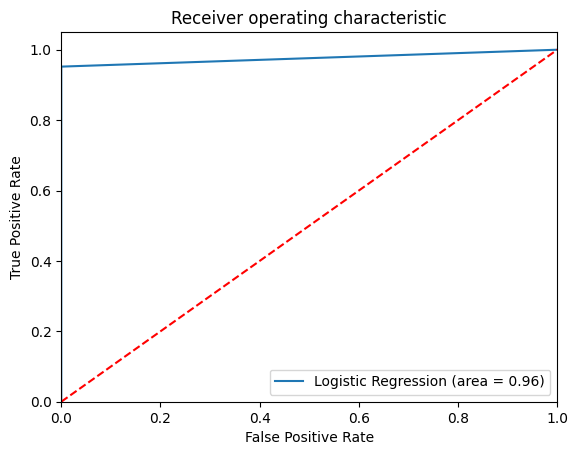

In [145]:

#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [146]:
##PREDICTION FOR NEW DATASET

Newdataset = pd.read_csv('newdata.csv')
sca=StandardScaler()
train=sca.fit_transform(train)
Newdataset=sca.transform(Newdataset)
Newdataset

/home/ongraph/Desktop/OnGraphProjects/Heart-and-Kidney-disease-prediction-Django/predict_risk_1/machine_learning_models/Models/venv/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[ 2.30000000e+01,  6.00000000e+01,  1.02000000e+00,
        -1.17683641e-16, -2.22044605e-18,  1.00000000e+00,
         1.00000000e+00,  4.44089210e-18, -3.57491814e-16,
         9.50000000e+01,  2.40000000e+01,  8.00000000e-01,
         1.45000000e+02,  5.00000000e+00,  1.50000000e+01,
         5.20000000e+01,  7.80000000e+03,  5.20000000e+00,
         9.65894031e-17,  1.40998324e-16,  7.99360578e-17,
         1.00000000e+00,  8.10462808e-17, -2.22044605e-18],
       [ 4.00000000e+00,  6.00000000e+01,  1.02000000e+00,
        -1.17683641e-16, -2.22044605e-18,  1.00000000e+00,
         1.00000000e+00,  4.44089210e-18, -3.57491814e-16,
         9.50000000e+01,  4.60000000e+01,  5.00000000e-01,
         1.38000000e+02,  4.20000000e+00,  1.50000000e+01,
         5.00000000e+01,  7.70000000e+03,  6.30000000e+00,
         9.65894031e-17,  1.40998324e-16,  7.99360578e-17,
         1.00000000e+00,  8.10462808e-17, -2.22044605e-18],
       [ 3.70000000e+01,  6.00000000e+01,  1.02500000e

In [147]:
ynew=classifier.predict(Newdataset)
print("---------",ynew,"------------")

--------- [1 1 1 1 1 1] ------------
